In [1]:
from matplotlib import pyplot as plt
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.datasets import load_airline
from aeon.forecasting.naive import NaiveForecaster
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error
from aeon.forecasting.bats import BATS

In [2]:
from aeon.forecasting.fbprophet import Prophet

In [3]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = np.arange(1,37)

In [11]:
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train)/12),
    add_country_holidays={"country_name": "Thailand"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)



In [12]:
forecaster.fit(y_train)

10:42:17 - cmdstanpy - INFO - Chain [1] start processing
10:42:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'Thailand'},
        daily_seasonality=False, n_changepoints=9,
        seasonality_mode='multiplicative', weekly_seasonality=False,
        yearly_seasonality=True)

In [13]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

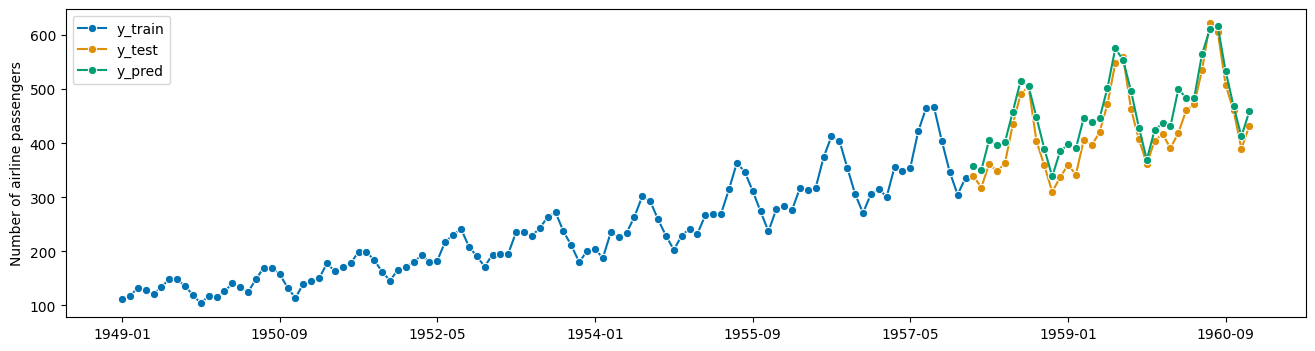

In [14]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [15]:
mean_absolute_percentage_error(y_test, y_pred)

0.07215515851776906